In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
df = pd.read_csv("Electric_Vehicle_Population_Data.csv", low_memory=False)

# Rename columns for easier access
df.columns = [
    "vin_1_10", "county", "city", "state", "postal_code", "model_year",
    "make", "model", "electric_vehicle_type", "cafv_eligibility",
    "electric_range", "base_msrp", "legislative_district", "dol_vehicle_id",
    "vehicle_location", "electric_utility", "census_tract_2020"
]

In [2]:
df.head()

,vin_1_10,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,cafv_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,census_tract_2020
0,JTDKN3DP2D,Yakima,Yakima,WA,98902.0,2013,TOYOTA,PRIUS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6.0,0.0,15.0,165252538,POINT (-120.51904 46.59783),PACIFICORP,5.307700e+10
1,1FMCU0E1XS,Kitsap,Port Orchard,WA,98366.0,2025,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37.0,0.0,26.0,278572521,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC,5.303509e+10
2,JM3KKBHA9R,Kitsap,Kingston,WA,98346.0,2024,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,23.0,275123642,POINT (-122.4977 47.79802),PUGET SOUND ENERGY INC,5.303509e+10
3,7SAYGDEE8P,Thurston,Olympia,WA,98501.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,35.0,249569323,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJ3E1EB5K,Thurston,Rainier,WA,98576.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,20.0,283135107,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10


In [3]:
df.info()
df.isna().sum().sort_values(ascending=False).head(10)
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261698 entries, 0 to 261697
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   vin_1_10               261698 non-null  object 
 1   county                 261688 non-null  object 
 2   city                   261688 non-null  object 
 3   state                  261698 non-null  object 
 4   postal_code            261688 non-null  float64
 5   model_year             261698 non-null  int64  
 6   make                   261698 non-null  object 
 7   model                  261698 non-null  object 
 8   electric_vehicle_type  261698 non-null  object 
 9   cafv_eligibility       261698 non-null  object 
 10  electric_range         261695 non-null  float64
 11  base_msrp              261695 non-null  float64
 12  legislative_district   261070 non-null  float64
 13  dol_vehicle_id         261698 non-null  int64  
 14  vehicle_location       261680 non-nu

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vin_1_10,261698,15753,7SAYGDEE7P,1199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
county,261688,236,King,130129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,261688,854,Seattle,41125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,261698,52,WA,261070,NaN,NaN,NaN,NaN,NaN,NaN,NaN
postal_code,261688.0,NaN,NaN,NaN,98176.150699,2555.75341,1469.0,98052.0,98133.0,98382.0,99577.0
model_year,261698.0,NaN,NaN,NaN,2021.772493,3.034041,2000.0,2020.0,2023.0,2024.0,2026.0
make,261698,46,TESLA,108777,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,261698,181,MODEL Y,54720,NaN,NaN,NaN,NaN,NaN,NaN,NaN
electric_vehicle_type,261698,2,Battery Electric Vehicle (BEV),208281,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cafv_eligibility,261698,3,Eligibility unknown as battery range has not b...,160888,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
import re

def extract_lat_lon(point_str):
    try:
        lon, lat = re.findall(r"[-+]?\d*\.\d+|\d+", point_str)
        return float(lat), float(lon)
    except:
        return None, None

# Clean up "(lat, long)" format
df[["latitude", "longitude"]] = df["vehicle_location"].apply(
    lambda x: pd.Series(extract_lat_lon(str(x)))
)

# Drop missing
df = df.dropna(subset=["latitude", "longitude"])

df[["vehicle_location", "latitude", "longitude"]].head()

# Drop missing
df = df.dropna(subset=["latitude", "longitude"])

df[["vehicle_location", "latitude", "longitude"]].head()

,vehicle_location,latitude,longitude
0,POINT (-120.51904 46.59783),46.59783,-120.51904
1,POINT (-122.63847 47.54103),47.54103,-122.63847
2,POINT (-122.4977 47.79802),47.79802,-122.49770
3,POINT (-122.89165 47.03954),47.03954,-122.89165
4,POINT (-122.68993 46.88897),46.88897,-122.68993


In [5]:
from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(df["longitude"], df["latitude"])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")

gdf.head()

,vin_1_10,county,city,state,postal_code,model_year,make,model,electric_vehicle_type,cafv_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,census_tract_2020,latitude,longitude,geometry
0,JTDKN3DP2D,Yakima,Yakima,WA,98902.0,2013,TOYOTA,PRIUS,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6.0,0.0,15.0,165252538,POINT (-120.51904 46.59783),PACIFICORP,5.307700e+10,46.59783,-120.51904,POINT (-120.51904 46.59783)
1,1FMCU0E1XS,Kitsap,Port Orchard,WA,98366.0,2025,FORD,ESCAPE,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,37.0,0.0,26.0,278572521,POINT (-122.63847 47.54103),PUGET SOUND ENERGY INC,5.303509e+10,47.54103,-122.63847,POINT (-122.63847 47.54103)
2,JM3KKBHA9R,Kitsap,Kingston,WA,98346.0,2024,MAZDA,CX-90,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26.0,0.0,23.0,275123642,POINT (-122.4977 47.79802),PUGET SOUND ENERGY INC,5.303509e+10,47.79802,-122.49770,POINT (-122.4977 47.79802)
3,7SAYGDEE8P,Thurston,Olympia,WA,98501.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,35.0,249569323,POINT (-122.89165 47.03954),PUGET SOUND ENERGY INC,5.306701e+10,47.03954,-122.89165,POINT (-122.89165 47.03954)
4,5YJ3E1EB5K,Thurston,Rainier,WA,98576.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,20.0,283135107,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10,46.88897,-122.68993,POINT (-122.68993 46.88897)


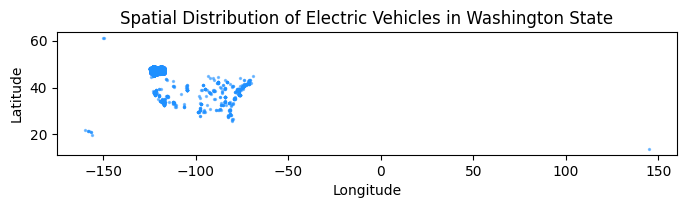

In [6]:
fig, ax = plt.subplots(figsize=(8, 8))
gdf.plot(ax=ax, markersize=2, color="dodgerblue", alpha=0.5)
plt.title("Spatial Distribution of Electric Vehicles in Washington State")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

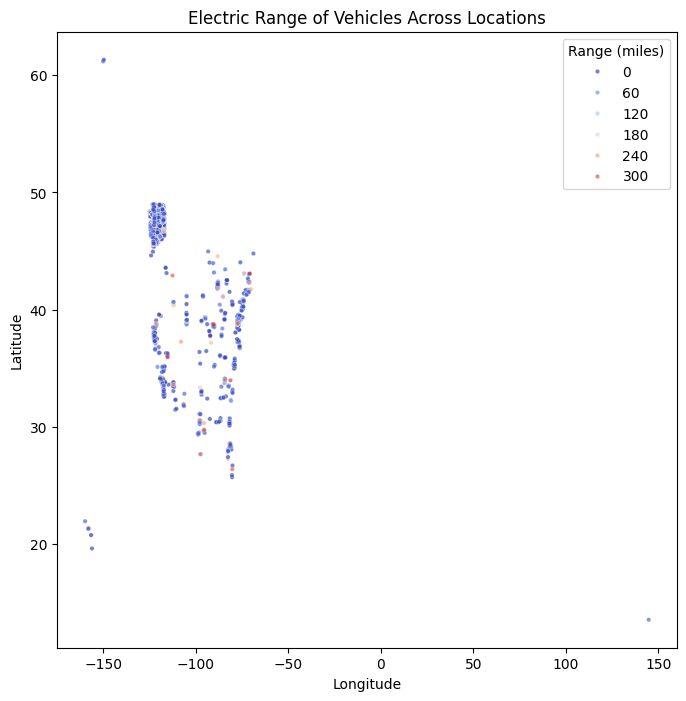

In [8]:
plt.figure(figsize=(8, 8))
sns.scatterplot(
    data=df,
    x="longitude",
    y="latitude",
    hue="electric_range",
    palette="coolwarm",
    alpha=0.7,
    s=10
)
plt.title("Electric Range of Vehicles Across Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Range (miles)")
plt.show()

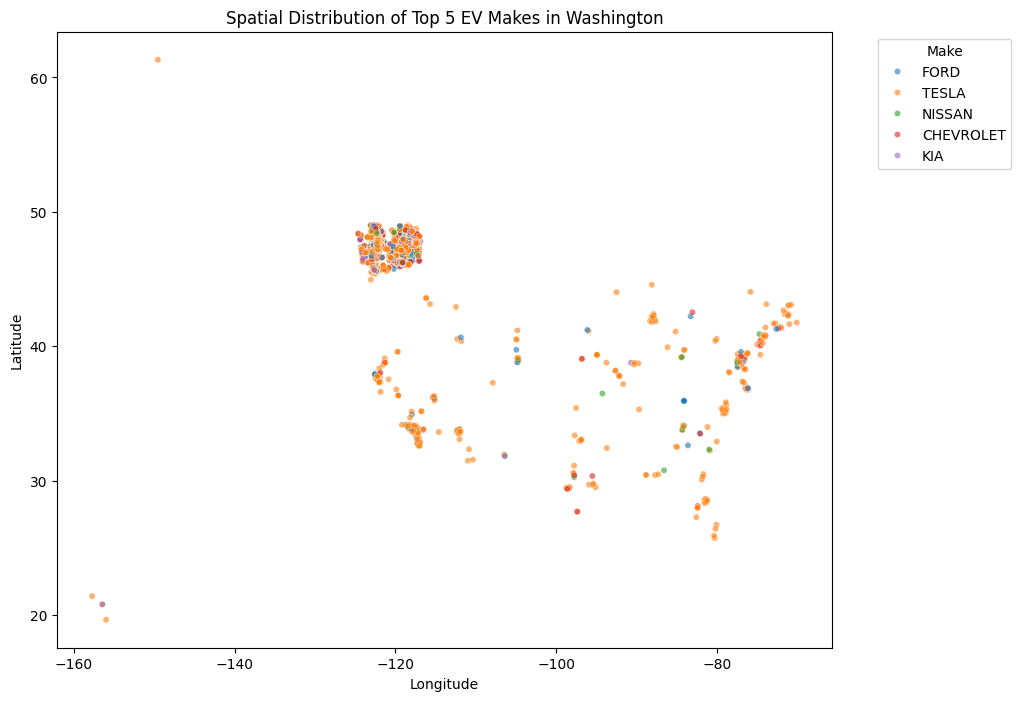

In [9]:
# Select top 5 EV brands
top_makes = df['make'].value_counts().head(5).index
df_top = df[df['make'].isin(top_makes)]

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_top,
    x="longitude", y="latitude",
    hue="make",
    alpha=0.6, s=20,
    palette="tab10"
)
plt.title("Spatial Distribution of Top 5 EV Makes in Washington")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Make", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

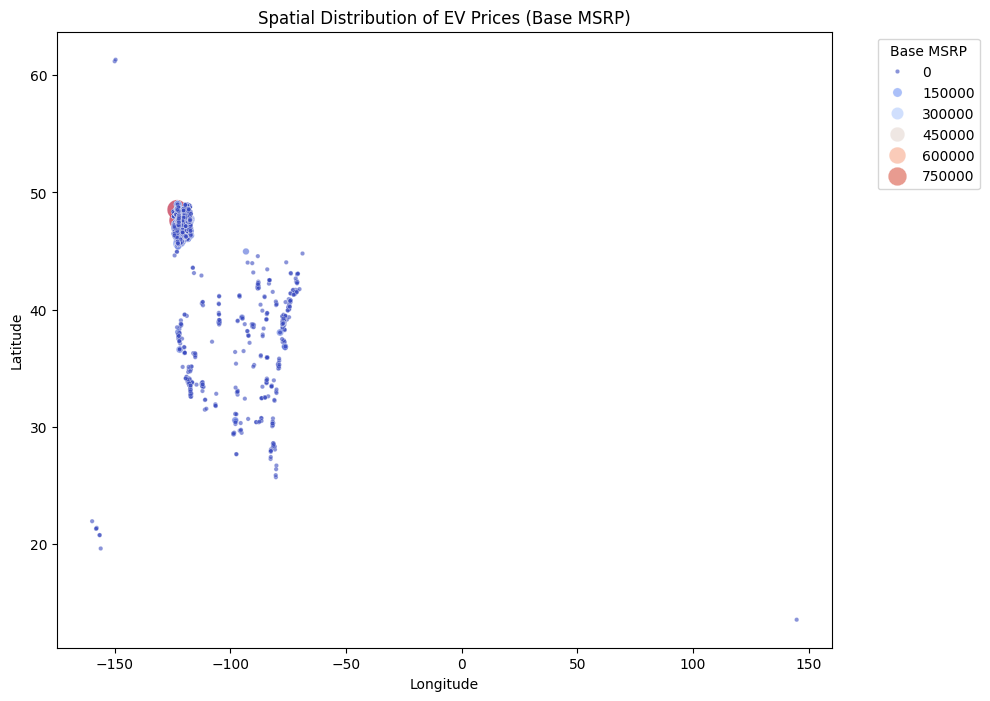

In [10]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x="longitude", y="latitude",
    size="base_msrp",
    hue="base_msrp",
    palette="coolwarm",
    alpha=0.6,
    sizes=(10, 200)
)
plt.title("Spatial Distribution of EV Prices (Base MSRP)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Base MSRP", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

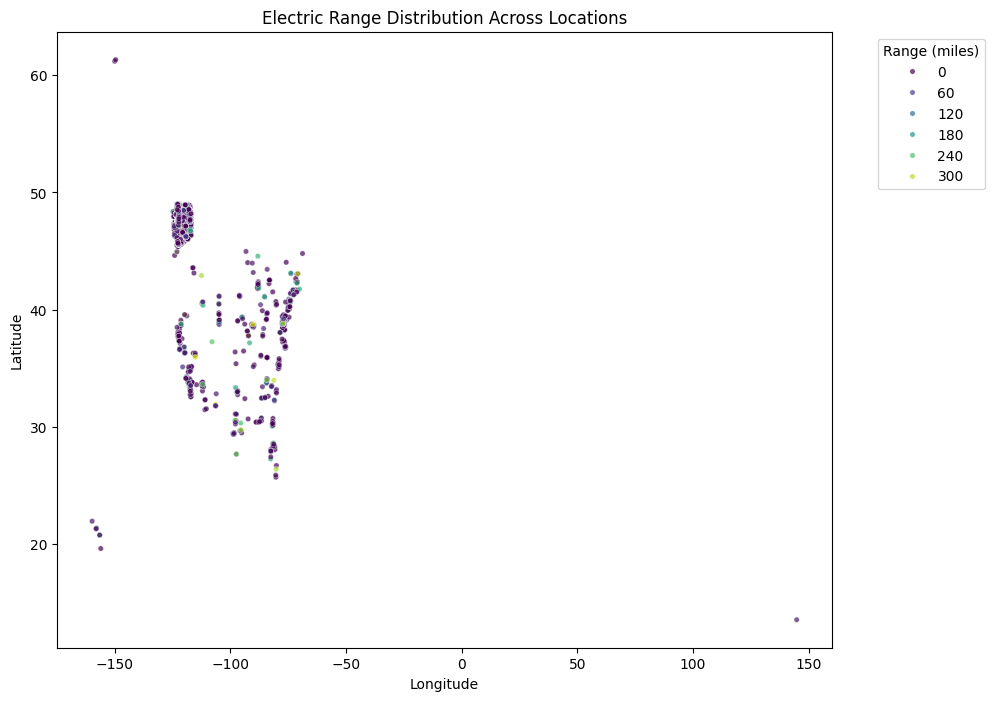

In [11]:
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df,
    x="longitude", y="latitude",
    hue="electric_range",
    palette="viridis",
    alpha=0.7, s=15
)
plt.title("Electric Range Distribution Across Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Range (miles)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

C:\Users\chana\AppData\Local\Temp\ipykernel_15084\488908552.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_makes.index, y=top_makes.values, palette="viridis")


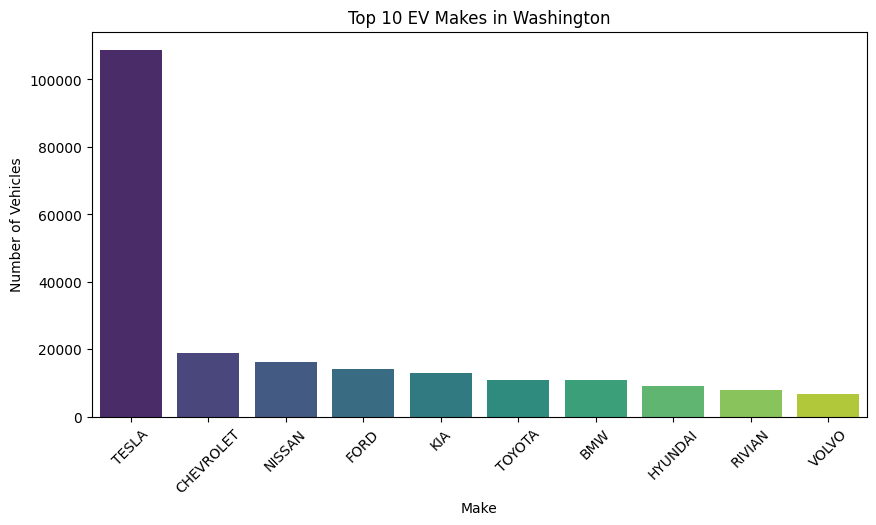

In [12]:
# Top 10 EV makes
top_makes = df['make'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_makes.index, y=top_makes.values, palette="viridis")
plt.title("Top 10 EV Makes in Washington")
plt.ylabel("Number of Vehicles")
plt.xlabel("Make")
plt.xticks(rotation=45)
plt.show()

C:\Users\chana\AppData\Local\Temp\ipykernel_15084\2783961374.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette="magma")


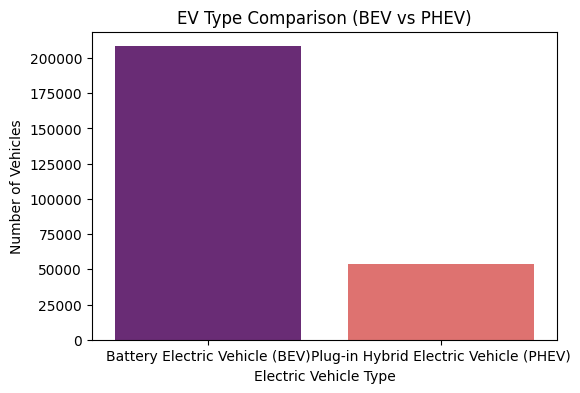

In [13]:
plt.figure(figsize=(6,4))
type_counts = df['electric_vehicle_type'].value_counts()
sns.barplot(x=type_counts.index, y=type_counts.values, palette="magma")
plt.title("EV Type Comparison (BEV vs PHEV)")
plt.ylabel("Number of Vehicles")
plt.xlabel("Electric Vehicle Type")
plt.show()

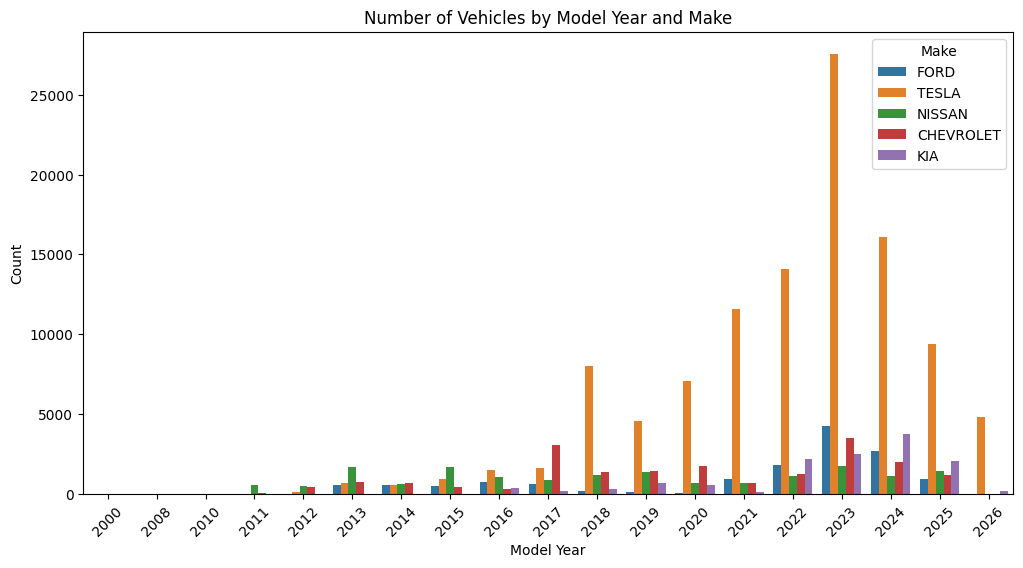

In [14]:
# Only keep top 5 makes for clarity
top5_makes = df['make'].value_counts().head(5).index
df_top5 = df[df['make'].isin(top5_makes)]

plt.figure(figsize=(12,6))
sns.countplot(data=df_top5, x='model_year', hue='make', palette="tab10")
plt.title("Number of Vehicles by Model Year and Make")
plt.ylabel("Count")
plt.xlabel("Model Year")
plt.xticks(rotation=45)
plt.legend(title="Make")
plt.show()

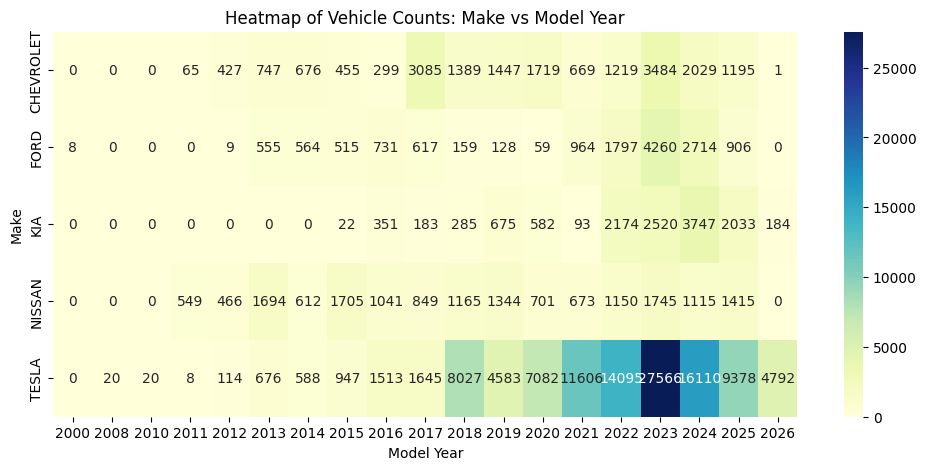

In [15]:
pivot = df_top5.pivot_table(index='make', columns='model_year', aggfunc='size', fill_value=0)
plt.figure(figsize=(12,5))
sns.heatmap(pivot, annot=True, fmt='d', cmap="YlGnBu")
plt.title("Heatmap of Vehicle Counts: Make vs Model Year")
plt.ylabel("Make")
plt.xlabel("Model Year")
plt.show()

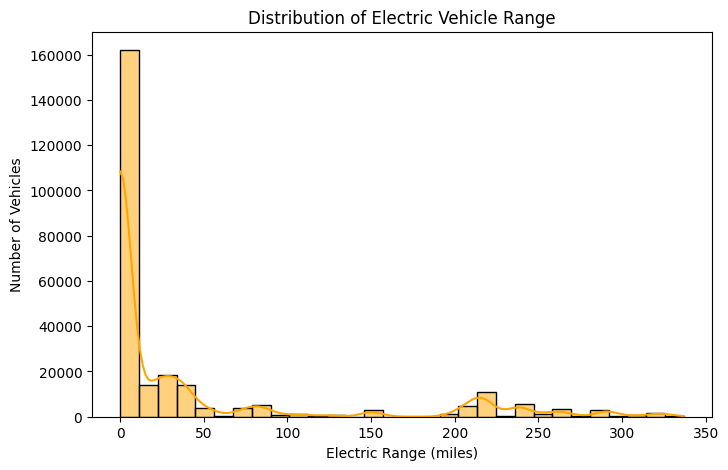

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['electric_range'].dropna(), bins=30, kde=True, color="orange")
plt.title("Distribution of Electric Vehicle Range")
plt.xlabel("Electric Range (miles)")
plt.ylabel("Number of Vehicles")
plt.show()